<a href="https://colab.research.google.com/github/hrnnikolov/ML_models/blob/main/pytorch_classification/classification_exercises_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
# Import torch
import torch

# Setup device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Setup random seed
RANDOM_SEED = 33

In [87]:
device

'cpu'

In [88]:
from sklearn.datasets import make_moons
n_samples = 1000

X, y = make_moons(n_samples, noise=0.03, random_state=3)

In [89]:
import pandas as pd

moons = pd.DataFrame({'X1': X[:,0], 'X2': X[:,1], 'label': y})
moons

,X1,X2,label
0,0.400682,-0.294040,1
1,1.063982,-0.465071,1
2,1.848180,0.034258,1
3,0.337338,0.928713,0
4,0.143896,-0.026368,1
...,...,...,...
995,1.944191,0.217050,1
996,0.358176,-0.297407,1
997,0.009953,0.985838,0
998,0.479082,-0.373724,1


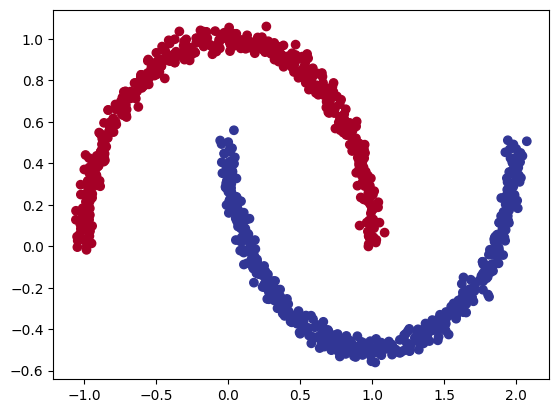

In [90]:
import matplotlib.pyplot as plt

plt.scatter(x=X[:,0], y=X[:,1], c=y, cmap=plt.cm.RdYlBu)

In [91]:
torch.__version__

'2.1.0+cu121'

In [92]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [93]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

In [94]:
from torch import nn

class MoonModeV0(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=6)
    self.layer_2 = nn.Linear(in_features=6, out_features=9)
    self.layer_3 = nn.Linear(in_features=9, out_features=1)
    self.relu = nn.ReLU()

  def forward(self, x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))


model_0 = MoonModeV0().to(device)
model_0


MoonModeV0(
  (layer_1): Linear(in_features=2, out_features=6, bias=True)
  (layer_2): Linear(in_features=6, out_features=9, bias=True)
  (layer_3): Linear(in_features=9, out_features=1, bias=True)
  (relu): ReLU()
)

In [95]:
# Setup the loss function
loss_fn = nn.BCEWithLogitsLoss()

def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc

# Setup optimizer to optimize model's parameters
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

In [96]:
# Building a training and testing loop
torch.manual_seed(33)
torch.cuda.manual_seed(33)

epochs = 1000

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  model_0.train()

  # forward pass
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # calculate loss/accuracy
  loss = loss_fn(y_logits, y_train)

  acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

  # optimizer
  optimizer.zero_grad()

  # backpropagation
  loss.backward()

  # optimizer step
  optimizer.step()

  # testing
  model_0.eval()
  with torch.inference_mode():
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

  test_loss = loss_fn(test_logits, y_test)
  test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

  # printing
  if epoch % 100 == 0:
    print(f'Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%')

Epoch: 0 | Loss: 0.69190, Acc: 47.75% | Test loss: 0.67838, Test acc: 59.00%
Epoch: 100 | Loss: 0.34606, Acc: 85.88% | Test loss: 0.31143, Test acc: 89.00%
Epoch: 200 | Loss: 0.23974, Acc: 88.88% | Test loss: 0.20324, Test acc: 92.00%
Epoch: 300 | Loss: 0.20861, Acc: 90.25% | Test loss: 0.17202, Test acc: 92.50%
Epoch: 400 | Loss: 0.17546, Acc: 92.25% | Test loss: 0.14288, Test acc: 94.00%
Epoch: 500 | Loss: 0.13483, Acc: 94.38% | Test loss: 0.10921, Test acc: 96.00%
Epoch: 600 | Loss: 0.09490, Acc: 96.62% | Test loss: 0.07693, Test acc: 97.50%
Epoch: 700 | Loss: 0.06090, Acc: 98.88% | Test loss: 0.04980, Test acc: 99.00%
Epoch: 800 | Loss: 0.03881, Acc: 99.88% | Test loss: 0.03170, Test acc: 100.00%
Epoch: 900 | Loss: 0.02614, Acc: 99.88% | Test loss: 0.02145, Test acc: 100.00%


In [97]:
# Make predictions with your trained model
import requests
from pathlib import Path
if Path('helper_function.py').is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

In [98]:
from helper_functions import plot_predictions, plot_decision_boundary

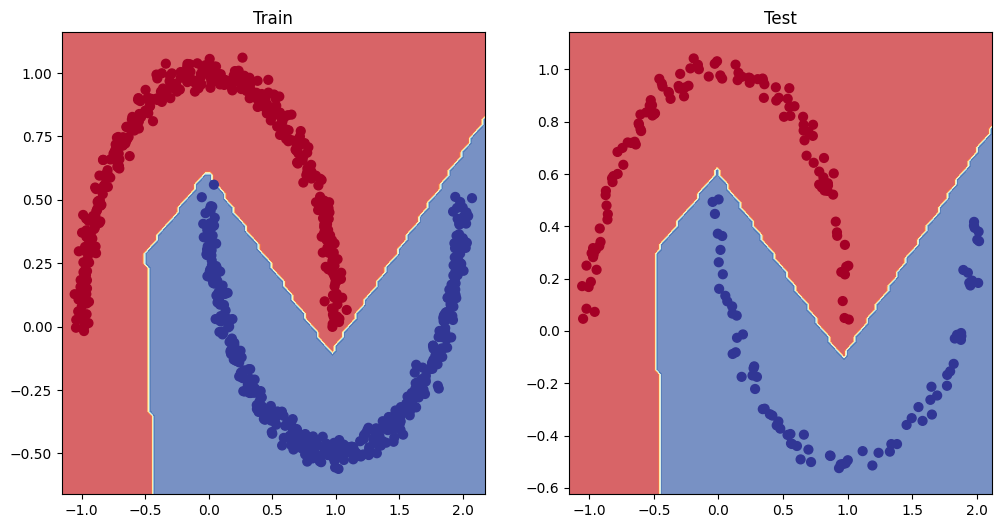

In [99]:
# Plot results

plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model_0, X_test, y_test)

In [100]:
# Second model that does not use non-linear layers

class MoonModeV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=6)
    self.layer_2 = nn.Linear(in_features=6, out_features=9)
    self.layer_3 = nn.Linear(in_features=9, out_features=1)

  def forward(self, x):
    return self.layer_3(self.layer_2(self.layer_1(x)))


model_1 = MoonModeV1().to(device)
model_1

MoonModeV1(
  (layer_1): Linear(in_features=2, out_features=6, bias=True)
  (layer_2): Linear(in_features=6, out_features=9, bias=True)
  (layer_3): Linear(in_features=9, out_features=1, bias=True)
)

In [101]:
# Setup optimizer to optimize model's parameters
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1)

In [102]:
# Building a training and testing loop
torch.manual_seed(33)
torch.cuda.manual_seed(33)

epochs = 1000

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  model_1.train()

  # forward pass
  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # calculate loss/accuracy
  loss = loss_fn(y_logits, y_train)

  acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

  # optimizer
  optimizer.zero_grad()

  # backpropagation
  loss.backward()

  # optimizer step
  optimizer.step()

  # testing
  model_1.eval()
  with torch.inference_mode():
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

  test_loss = loss_fn(test_logits, y_test)
  test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

  # printing
  if epoch % 100 == 0:
    print(f'Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%')

Epoch: 0 | Loss: 0.66173, Acc: 83.12% | Test loss: 0.01554, Test acc: 100.00%
Epoch: 100 | Loss: 0.28065, Acc: 85.38% | Test loss: 0.01554, Test acc: 100.00%
Epoch: 200 | Loss: 0.24664, Acc: 88.12% | Test loss: 0.01554, Test acc: 100.00%
Epoch: 300 | Loss: 0.24446, Acc: 88.38% | Test loss: 0.01554, Test acc: 100.00%
Epoch: 400 | Loss: 0.24435, Acc: 88.25% | Test loss: 0.01554, Test acc: 100.00%
Epoch: 500 | Loss: 0.24435, Acc: 88.38% | Test loss: 0.01554, Test acc: 100.00%
Epoch: 600 | Loss: 0.24435, Acc: 88.38% | Test loss: 0.01554, Test acc: 100.00%
Epoch: 700 | Loss: 0.24435, Acc: 88.38% | Test loss: 0.01554, Test acc: 100.00%
Epoch: 800 | Loss: 0.24435, Acc: 88.38% | Test loss: 0.01554, Test acc: 100.00%
Epoch: 900 | Loss: 0.24435, Acc: 88.38% | Test loss: 0.01554, Test acc: 100.00%


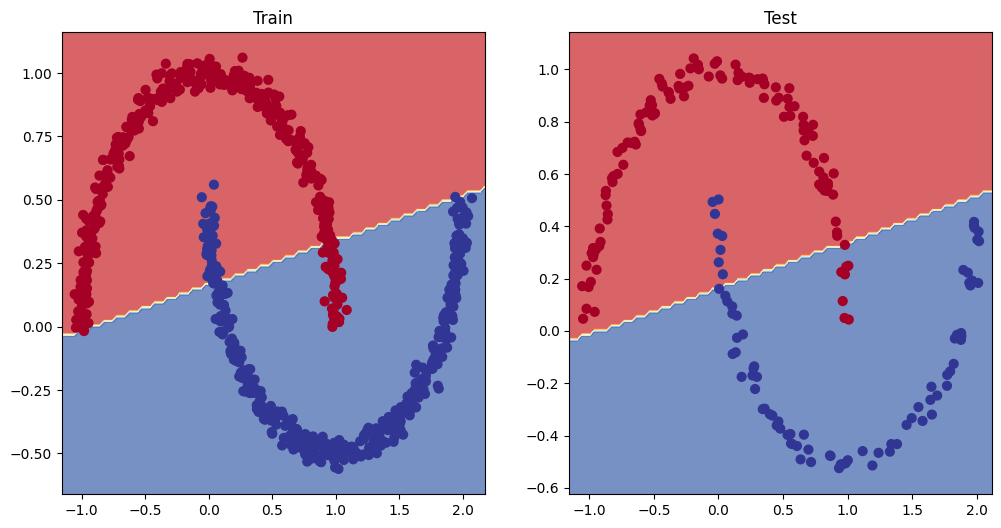

In [103]:
# Plot decision boundaries
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train) # model_1 = no non-linearity
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test) # model_3 = has non-linearity